<a href="https://colab.research.google.com/github/Ashara-kosi/ML-projects/blob/main/Voice_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
data = pd.read_csv('voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
#viewing the distribution of the data for both male and female
data.groupby('label').count()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
label,,,,,,,,,,,,,,,,,,,,
female,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584
male,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584


<BarContainer object of 3168 artists>

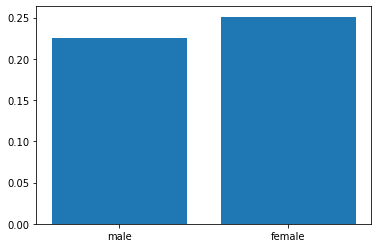

In [5]:
#understanding the dataset
plt.bar(data['label'] ,data['meanfreq'])



<BarContainer object of 3168 artists>

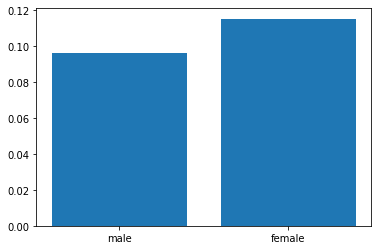

In [6]:
plt.bar(data['label'] ,data['sd'])

<BarContainer object of 3168 artists>

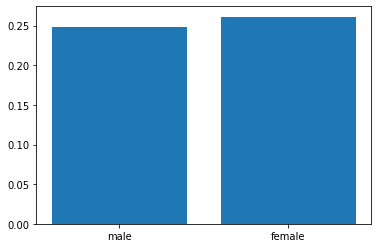

In [7]:
plt.bar(data['label'] ,data['median'])

<BarContainer object of 3168 artists>

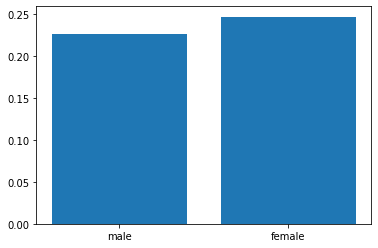

In [8]:
plt.bar(data['label'] ,data['Q25'])

<BarContainer object of 3168 artists>

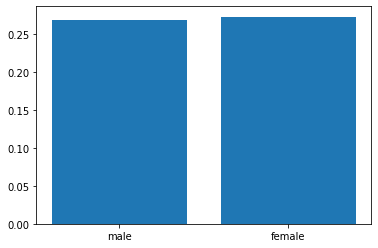

In [9]:
plt.bar(data['label'] ,data['Q75'])

<BarContainer object of 3168 artists>

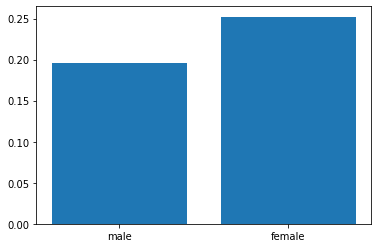

In [10]:
plt.bar(data['label'] ,data['IQR'])

<BarContainer object of 3168 artists>

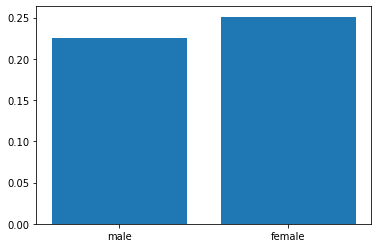

In [11]:
plt.bar(data['label'] ,data['meanfreq'])

In [12]:
#encoding the label
data['label'].replace(to_replace={'male':1,'female':0},inplace = True)
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [16]:
#feature selection
X = data.iloc[:,0:50]  #independent columns
y = data.iloc[:,-1]    #target column i.e label
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

       Specs         Score
7       kurt  11987.597926
20     label   1584.000000
17    maxdom    297.819019
18   dfrange    290.272018
15   meandom     38.460229
9        sfm     31.246850
5        IQR     26.337745
6       skew     24.329583
12   meanfun     16.094352
3        Q25     13.977196
16    mindom      9.162780
1         sd      3.535149
10      mode      3.369843
2     median      1.818288
0   meanfreq      1.783946


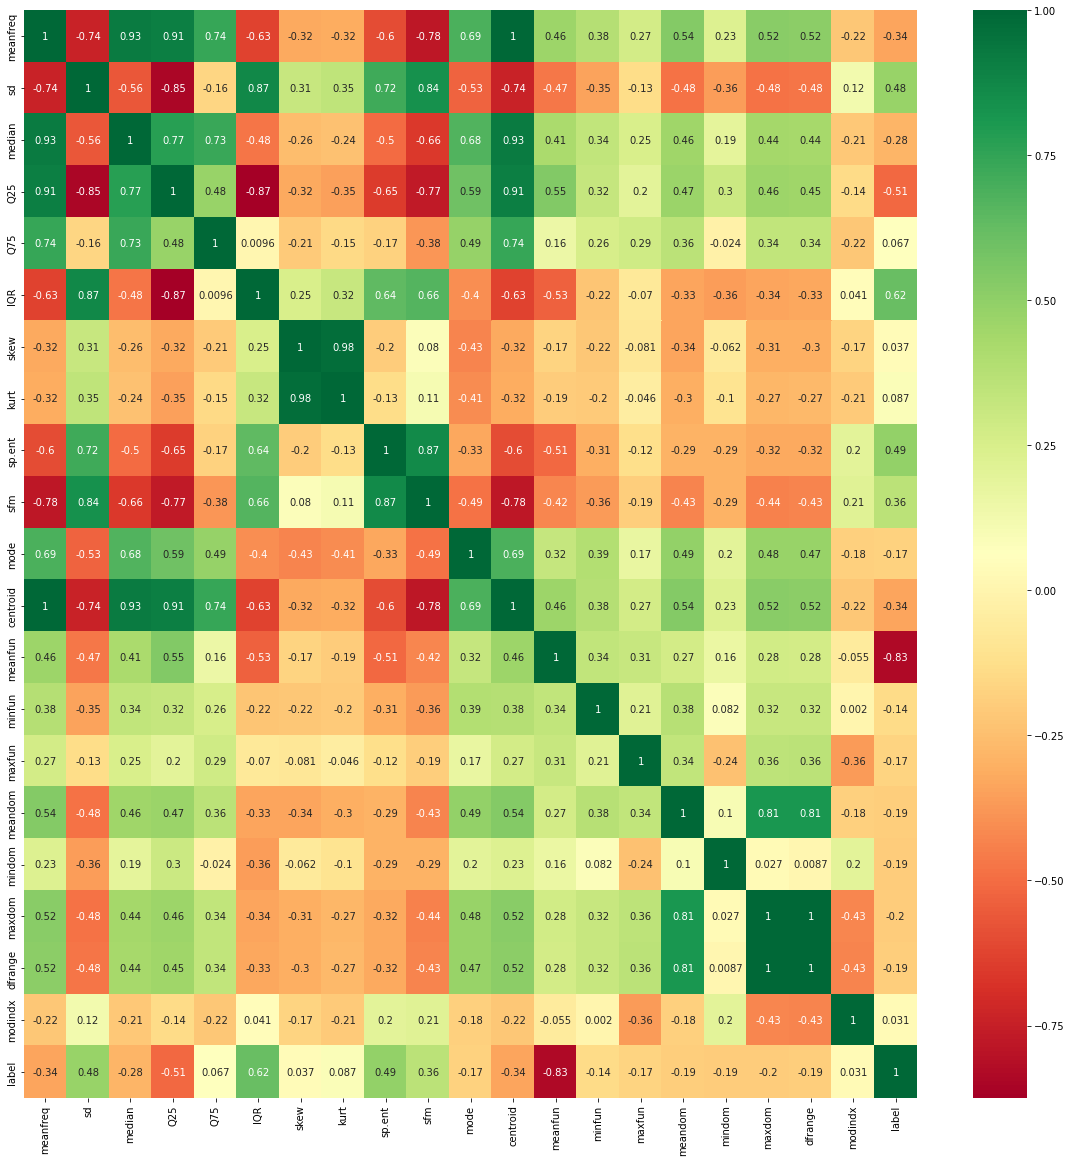

In [17]:
#using heatmap
import seaborn as sns

X = data.iloc[:,0:50]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [24]:
#Selecting features from the heatmap that a greater than 0 for the independent variables
data.head()
new_data = data[['sd','IQR','skew','kurt','sp.ent','sfm','modindx','Q75','label']]

In [41]:
#splitting the dataset
import array as arr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
y = new_data.label.values.reshape(-1,1)
x = new_data.drop(["label"], axis=1)
maxm = 0
a = arr.array('f',[])
b = arr.array('i',)

In [42]:
#transforming the train and test data and training the dataset
for i in range (0,1000):
  x_train,x_test,y_train,y_test = \
  train_test_split(x,y,test_size=0.3,random_state = i)
  stdc = StandardScaler()
  x_train_std = stdc.fit_transform(x_train)
  x_test_std = stdc.fit_transform(x_test)
  logit = LogisticRegression()
  logit.fit(x_train_std,y_train.ravel())
  score = logit.score(x_train_std,y_train)
  a.append(score)
  b.append(i)

  if (maxm<score):
    maxm = score

  

Accuracy:: 88.9490302210194


In [44]:
#predicting
y_pred = logit.predict(x_test_std)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

Number of mislabeled points out of a total 951 points : 450781

Accuracy: 0.86



Text(0, 0.5, 'Accuracy')

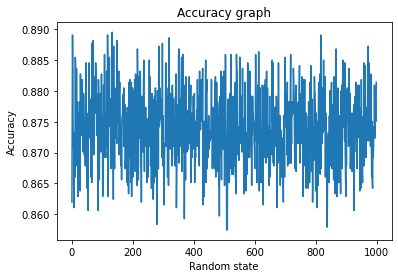

In [45]:
#plotting the accuracy
plt.plot(b,a)
plt.title('Accuracy graph')
plt.xlabel('Random state')
plt.ylabel('Accuracy')